In [2]:
import cv2
import numpy as np
import os


image_path = 'Finding/1_obj.jpg'
image = cv2.imread(image_path)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, thresh = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY_INV)

contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

output_dir = 'Counting_Templates'
os.makedirs(output_dir, exist_ok=True)

min_size = 50

# Iterate over each contour found
for idx, contour in enumerate(contours):
    # Get bounding box coordinates for each contour
    x, y, w, h = cv2.boundingRect(contour)
    
    # Skip small objects (likely noise or empty spaces)
    if w > min_size and h > min_size:
        # Crop the object from the original image
        cropped_object = image[y:y+h, x:x+w]
        
        # Save the cropped object as a separate image
        object_path = os.path.join(output_dir, f'object_{idx+1}.png')
        cv2.imwrite(object_path, cropped_object)

print(f"Extracted and saved objects to {output_dir} (filtered by size).")

Extracted and saved objects to Counting_Templates (filtered by size).


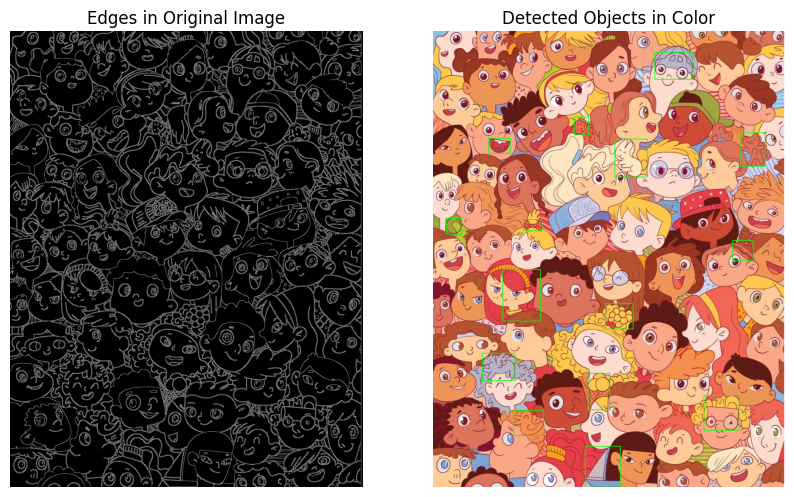

In [26]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

template_folder = 'Counting_Templates'
original_image_color = cv2.imread('Finding/1_cut.png')

original_image_gray = cv2.cvtColor(original_image_color, cv2.COLOR_BGR2GRAY)
edges_original = cv2.Canny(original_image_gray, 50, 150)

template_files = [filename for filename in os.listdir(template_folder)
                  if filename.endswith('.png')]

detected_image = original_image_color.copy()

scale_factors = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9]

for template_file in template_files[:15]:  
    template_image = cv2.imread(os.path.join(template_folder, template_file), 0)  

    # Canny Edge Detection
    edges_template = cv2.Canny(template_image, 50, 150)

    best_value = -1  
    best_location = None
    best_match = None

    for scale in scale_factors:
        # Resize template
        resized_template = cv2.resize(edges_template, 
                                      (int(edges_template.shape[1] * scale), 
                                       int(edges_template.shape[0] * scale)))


        result = cv2.matchTemplate(edges_original, resized_template, cv2.TM_CCOEFF_NORMED)
        
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

        if max_val > best_value:
            best_value = max_val
            best_match = resized_template
            best_location = max_loc
    if best_location is not None:  
        top_left = best_location
        h, w = best_match.shape[:2]
        bottom_right = (top_left[0] + w, top_left[1] + h)
        cv2.rectangle(detected_image, top_left, bottom_right, (0, 255, 0), 2)  

detected_image_rgb = cv2.cvtColor(detected_image, cv2.COLOR_BGR2RGB)

# Hiển thị kết quả với matplotlib
plt.figure(figsize=(10, 6))
plt.subplot(121), plt.imshow(edges_original, cmap='gray')
plt.title('Edges in Original Image'), plt.axis('off')

plt.subplot(122), plt.imshow(detected_image_rgb)
plt.title('Detected Objects in Color'), plt.axis('off')

plt.show()

In [27]:
import cv2
import numpy as np
import os

image_path = 'Finding/2_obj.jpg'
image = cv2.imread(image_path)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, thresh = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY_INV)

contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

output_dir = 'Finding_Templates2'
os.makedirs(output_dir, exist_ok=True)

min_size = 50

# Iterate over each contour found
for idx, contour in enumerate(contours):
    # Get bounding box coordinates for each contour
    x, y, w, h = cv2.boundingRect(contour)
    
    # Skip small objects (likely noise or empty spaces)
    if w > min_size and h > min_size:
        # Crop the object from the original image
        cropped_object = image[y:y+h, x:x+w]
        
        # Save the cropped object as a separate image
        object_path = os.path.join(output_dir, f'object_{idx+1}.png')
        cv2.imwrite(object_path, cropped_object)

print(f"Extracted and saved objects to {output_dir} (filtered by size).")

Extracted and saved objects to Finding_Templates2 (filtered by size).


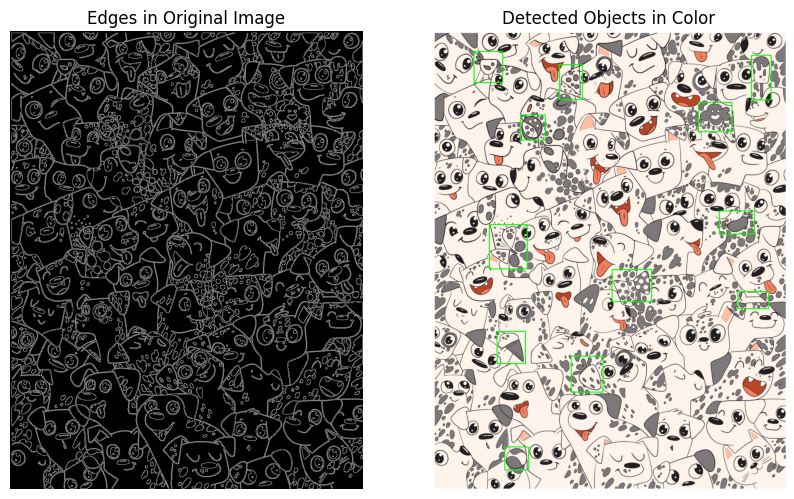

In [33]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

template_folder = 'Finding_Templates2'

original_image_color = cv2.imread('Finding/2_cut.png')

original_image_gray = cv2.cvtColor(original_image_color, cv2.COLOR_BGR2GRAY)
edges_original = cv2.Canny(original_image_gray, 50, 150)

template_files = [filename for filename in os.listdir(template_folder)
                  if filename.endswith('.png')]

detected_image = original_image_color.copy()

scale_factors = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9]

for template_file in template_files[:15]: 
    template_image = cv2.imread(os.path.join(template_folder, template_file), 0)

    #Canny Edge Detection
    edges_template = cv2.Canny(template_image, 50, 150)

    best_value = -1  # Khởi tạo giá trị thấp nhất
    best_location = None
    best_match = None

    for scale in scale_factors:
        # Resize template
        resized_template = cv2.resize(edges_template, 
                                      (int(edges_template.shape[1] * scale), 
                                       int(edges_template.shape[0] * scale)))

        result = cv2.matchTemplate(edges_original, resized_template, cv2.TM_CCOEFF_NORMED)
 
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

        if max_val > best_value:
            best_value = max_val
            best_match = resized_template
            best_location = max_loc
    if best_location is not None:  
        top_left = best_location
        h, w = best_match.shape[:2]
        bottom_right = (top_left[0] + w, top_left[1] + h)
        cv2.rectangle(detected_image, top_left, bottom_right, (0, 255, 0), 2)

detected_image_rgb = cv2.cvtColor(detected_image, cv2.COLOR_BGR2RGB)

# Hiển thị kết quả với matplotlib
plt.figure(figsize=(10, 6))
plt.subplot(121), plt.imshow(edges_original, cmap='gray')
plt.title('Edges in Original Image'), plt.axis('off')

plt.subplot(122), plt.imshow(detected_image_rgb)
plt.title('Detected Objects in Color'), plt.axis('off')
plt.show()